In [1]:
from pathlib import Path 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

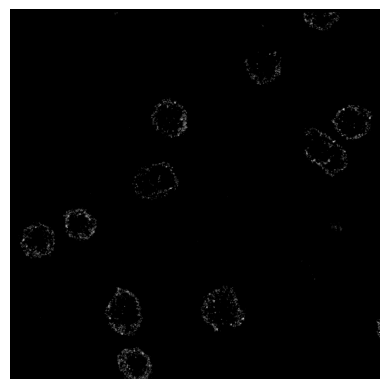

In [2]:
datafile = Path("../data/CoordTable_SAFE360_2D.csv")
data = pd.read_csv(datafile, index_col='id')
xs = data['x [nm]'].to_numpy()
ys = data['y [nm]'].to_numpy()
cnts, _, _  = np.histogram2d(ys, xs, bins=np.arange(0, 60001, 100))
image = np.log1p(cnts)
plt.imshow(image, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

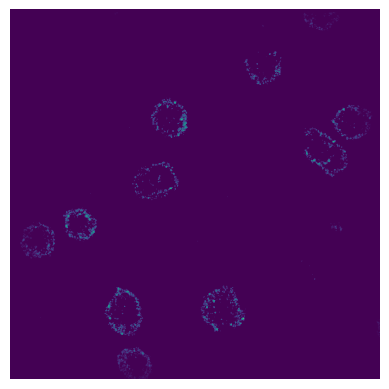

In [3]:
from scipy.signal import get_window

window_y = get_window(("general_gaussian", 4, 250), image.shape[0])
window_x = get_window(("general_gaussian", 4, 250), image.shape[1])
window = np.outer(window_y, window_x)
plt.imshow(window * image)
plt.axis('off')

In [35]:
def decorr(image):
    from scipy.fft import fft2
    g = fft2(image - image.mean())
    gn = g / np.abs(g)

    x_freqs, y_freqs = np.meshgrid(np.fft.fftfreq(image.shape[1]) * image.shape[1], np.fft.fftfreq(image.shape[0]) * image.shape[0])
    freqs = np.sqrt(x_freqs ** 2 + y_freqs ** 2)

    c = []
    xs = np.linspace(0, image.shape[0] / 2, 200)
    for r in xs:
        mask = freqs <= r
        c.append(np.abs(g)[mask].sum() / np.sqrt(np.count_nonzero(mask)))

    return xs / image.shape[0], c

Text(0, 0.5, 'decorr')

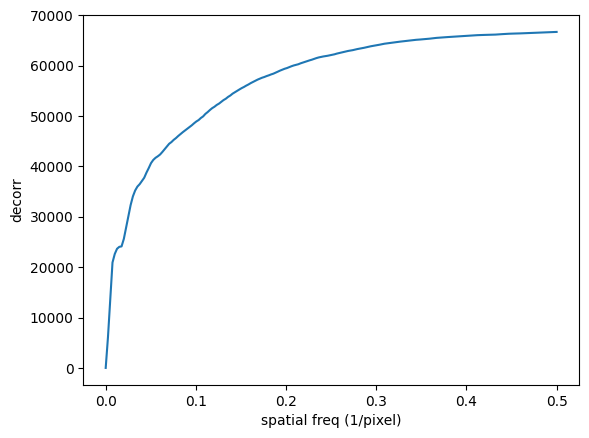

In [36]:
x, y = decorr(image)

plt.plot(x, y)
plt.xlabel("spatial freq (1/pixel)")
plt.ylabel("decorr")

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

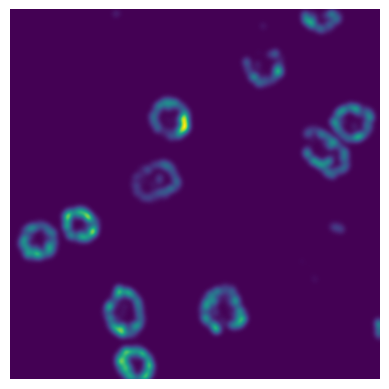

In [37]:
from scipy.signal import convolve2d

sigma = 1
kernel = np.exp ( - np.linspace(-10, 10, 100) ** 2 / 2 / sigma / sigma)
kernel = kernel / kernel.sum()
kernel = np.outer(kernel, kernel)
image_filtered = convolve2d(image, kernel, "same")

plt.imshow(image_filtered)
plt.axis('off')

Text(0, 0.5, 'decorr')

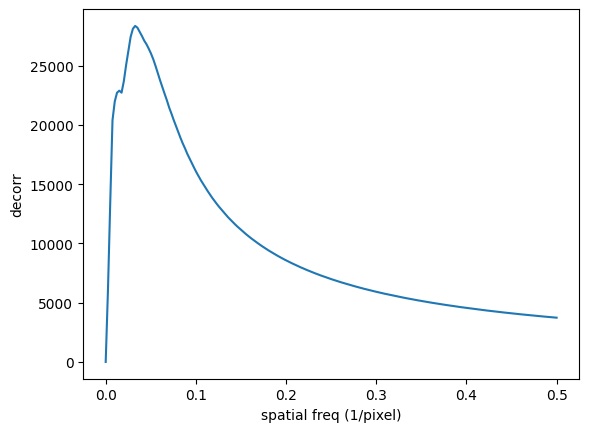

In [38]:
x, y = decorr(image_filtered)

plt.plot(x, y)
plt.xlabel("spatial freq (1/pixel)")
plt.ylabel("decorr")